In [1]:
## Import things

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import networkX
import networkx as nx

# Import multiNetX
import multinetx as mx

print("Done importing packages :)")

Done importing packages :)


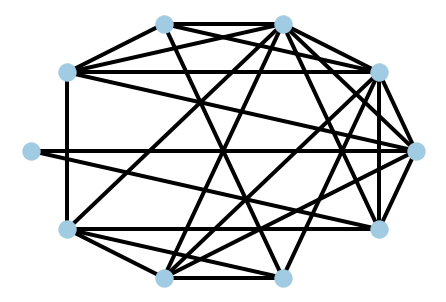

In [2]:
## Make multilayer network with multinetx

nNodes = 10
g1 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=218)
# g1 is a regular networkx graph
pos1 = nx.circular_layout(g1)
nx.draw(g1, pos1, node_color='#A0CBE2',width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

In [3]:
# Make more layers


g2 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=132)
g3 = mx.generators.erdos_renyi_graph(nNodes,0.5,seed=198)


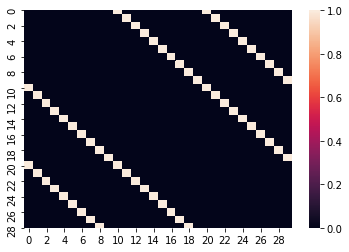

In [4]:
# Define adjacency between layers
adj_block = mx.lil_matrix(np.zeros((nNodes*3,nNodes*3)))


adj_block[0:  nNodes,  nNodes:2*nNodes] = np.identity(nNodes)    # L_12
adj_block[0:  nNodes,2*nNodes:3*nNodes] = np.identity(nNodes)    # L_13
adj_block[nNodes:2*nNodes,2*nNodes:3*nNodes] = np.identity(nNodes)    # L_23

adj_block += adj_block.T

sns.heatmap(adj_block.todense())

In [5]:
# Create multilayer graph
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

In [6]:
# Setting inter/intra layer weights
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=3)

# " The object mg inherits all properties from Graph of networkX, so that we can calculate adjacency or Laplacian matrices, their eigenvalues, etc."


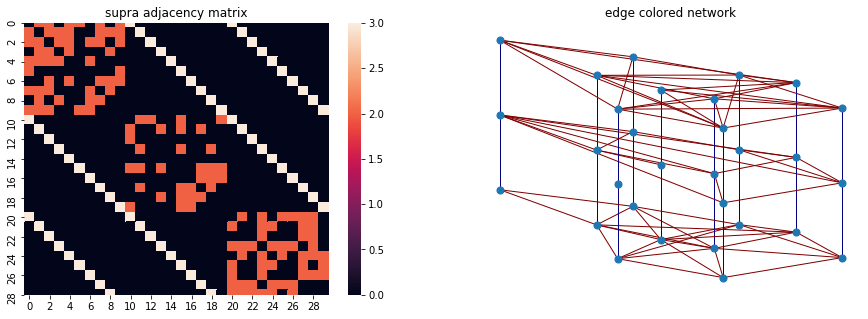

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.heatmap(mx.adjacency_matrix(mg,weight='weight').todense())
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
                      layer_vertical_shift=0.2,
                      layer_horizontal_shift=0.0,
                      proj_angle=47)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

In [8]:
mx.dicoLayerNode(mg) # return dict of node and it's layer


{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 3,
 21: 3,
 22: 3,
 23: 3,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 3}

In [9]:
mg.edges()

EdgeView([(0, 1), (0, 2), (0, 4), (0, 5), (0, 7), (0, 9), (0, 10), (0, 20), (1, 2), (1, 3), (1, 4), (1, 7), (1, 8), (1, 9), (1, 11), (1, 21), (2, 3), (2, 4), (2, 6), (2, 7), (2, 9), (2, 12), (2, 22), (3, 4), (3, 8), (3, 13), (3, 23), (4, 6), (4, 14), (4, 24), (5, 9), (5, 15), (5, 25), (6, 7), (6, 8), (6, 9), (6, 16), (6, 26), (7, 8), (7, 17), (7, 27), (8, 18), (8, 28), (9, 19), (9, 29), (10, 11), (10, 12), (10, 15), (10, 19), (10, 20), (11, 13), (11, 15), (11, 17), (11, 21), (12, 22), (13, 15), (13, 18), (13, 23), (14, 24), (15, 17), (15, 18), (15, 19), (15, 25), (16, 17), (16, 18), (16, 19), (16, 26), (17, 18), (17, 27), (18, 28), (19, 29), (20, 21), (20, 23), (20, 25), (20, 26), (20, 27), (20, 28), (21, 23), (21, 24), (21, 27), (21, 28), (22, 23), (22, 27), (22, 28), (23, 24), (23, 25), (23, 26), (23, 28), (24, 25), (24, 27), (24, 28), (24, 29), (25, 27), (25, 29), (26, 27), (26, 28), (26, 29)])

In [10]:
# All the networkx stuff is just projecting/flattening the mx to a networkx graph then running networkx functions.



In [11]:
## Next the louvain package

import igraph as ig
import louvain

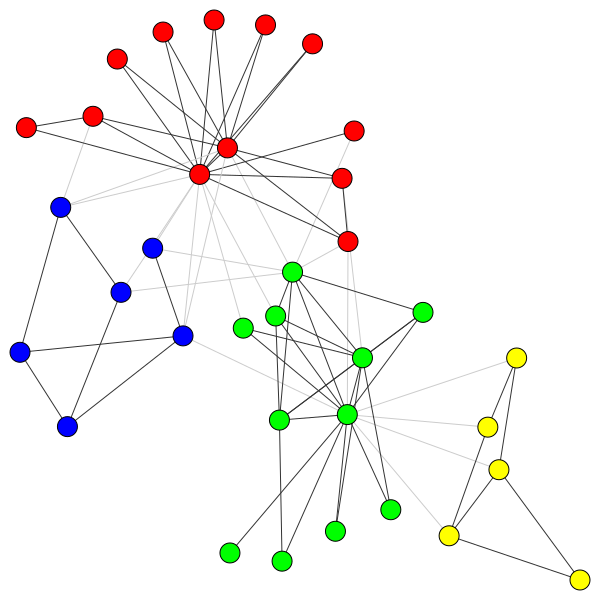

In [12]:
G = ig.Graph.Famous('Zachary')
partition = louvain.find_partition(G, louvain.ModularityVertexPartition)
ig.plot(partition) 

In [13]:
# build an optimizer 
optimiser = louvain.Optimiser()

In [14]:
# Need to build a few igraph graphs

g1 = ig.Graph.GRG(20, 0.2)
g1_adj = g1.get_adjacency()
g1_adj.shape # Returns matrix ... close

g2 = ig.Graph.GRG(20,0.2)
g3 = ig.Graph.GRG(20,0.3)

# sns.heatmap(g1_adj)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2]


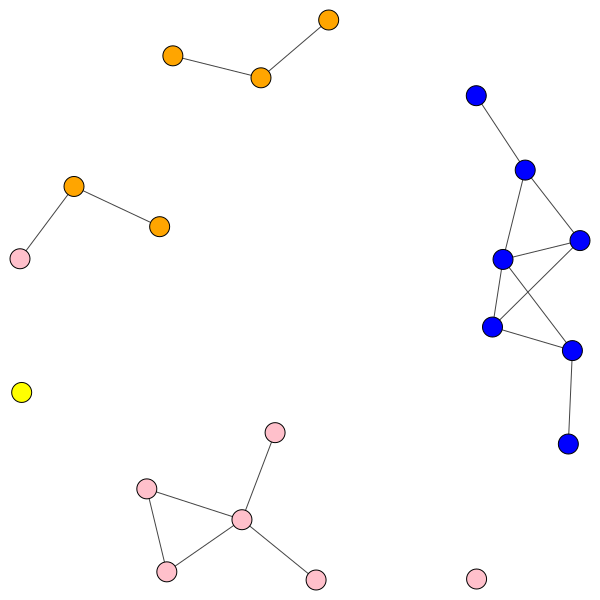

In [33]:
# community detection
membership, improv = louvain.find_partition_multiplex([g1, g2], louvain.ModularityVertexPartition);
print(membership)

# Then I suppose we'd plot and add colors
# A = g1.get_edgelist()
# G = nx.DiGraph(A) # In case your graph is directed
# G = nx.Graph(A)
# G
color_dict = {0: "blue", 1: "pink", 2:"orange", 3:"yellow" }
g1.vs["color"] = [color_dict[member] for member in membership]
layout = g1.layout("kamada_kawai")
ig.plot(g1,layout=layout)

In [19]:
partition = louvain.ModularityVertexPartition(G)

0.0

In [20]:
G_pos = ig.Graph.SBM(100, pref_matrix=[[0.5, 0.1], [0.1, 0.5]], block_sizes=[50, 50])
G_neg = ig.Graph.SBM(100, pref_matrix=[[0.1, 0.5], [0.5, 0.1]], block_sizes=[50, 50])
optimiser = louvain.Optimiser()
partition_pos = louvain.ModularityVertexPartition(G_pos)
partition_neg = louvain.ModularityVertexPartition(G_neg)
diff = optimiser.optimise_partition_multiplex(partitions=[partition_pos, partition_neg],layer_weights=[1,-1])

In [21]:
diff

0.0